# Import data

In [1]:
import os
import pandas as pd
import collections
import seaborn as sns
import re
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [2]:
def importCsvs(path, type="csv"):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the file
            if type == "csv":
                df = pd.read_csv(path + folder + "/" + file)
            elif type == "json":
                df = pd.read_json(path + folder + "/" + file, lines=True)
            else:
                print("Error: unknown file type")
                return
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            cmd = re.sub("\..*", "", file)
            allDfs[folder][cmd] = df
            
        

    return allDfs

# Import the csv files
trainDfs = importCsvs("./train/")
testDfs = importCsvs("./test/", "json")

# Data analysis

Count number of submissions, correct and incorrect. 

In [3]:
def analyzeData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0])
            ]

    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["green", "red"])

    return analysisDf

## Analyze train data

Total number of submissions: 21231
Total number of correct submissions: 9321
Total number of incorrect submissions: 11910


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
80,YH3ANm7Y5Qe5dSYem,inv11,523,59,464
45,gAeD3MTGCCv8YNTaK,weaklyConnected,444,64,380
15,9jPK8KBWzjFmBx4Hb,prop5,423,65,358
3,9jPK8KBWzjFmBx4Hb,prop12,408,37,371
83,YH3ANm7Y5Qe5dSYem,inv14,404,41,363
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
81,YH3ANm7Y5Qe5dSYem,inv12,383,41,342
96,zoEADeCW2b2suJB2k,inv4,377,54,323
1,9jPK8KBWzjFmBx4Hb,prop10,348,53,295
102,zRAn69AocpkmxXZnW,inv11,339,73,266


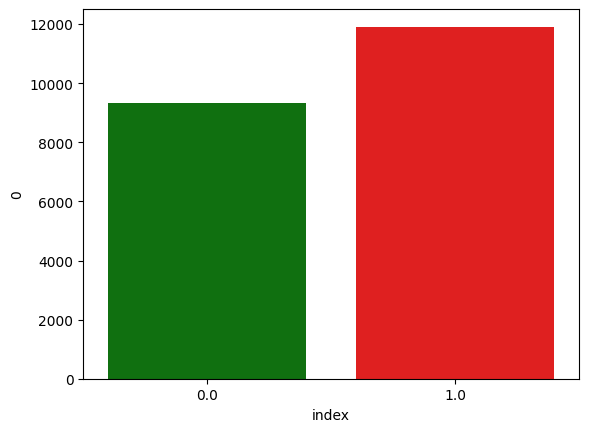

In [4]:
analyzeData(trainDfs)

In [75]:
df = trainDfs["zoEADeCW2b2suJB2k"]["inv4"]
df[df["_id"] == "uBvS4dNpzkq6gCcLi"]
df[df["_id"] == "S4Fzpaoi6twJpiZrh"]


,_id,time,code,derivationOf,cmd_n,sat,expr,ast


## Analyze test data

Total number of submissions: 1346
Total number of correct submissions: 0
Total number of incorrect submissions: 1346


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
56,zoEADeCW2b2suJB2k,inv4,94,0,94
44,YH3ANm7Y5Qe5dSYem,inv14,91,0,91
66,zRAn69AocpkmxXZnW,inv15,77,0,77
28,PQAJE67kz8w5NWJuM,inv7,57,0,57
16,JC8Tij8o8GZb99gEJ,Inv4,53,0,53
11,gAeD3MTGCCv8YNTaK,undirected,53,0,53
45,YH3ANm7Y5Qe5dSYem,inv15,51,0,51
12,gAeD3MTGCCv8YNTaK,weaklyConnected,49,0,49
41,YH3ANm7Y5Qe5dSYem,inv11,47,0,47
27,PQAJE67kz8w5NWJuM,inv6,45,0,45


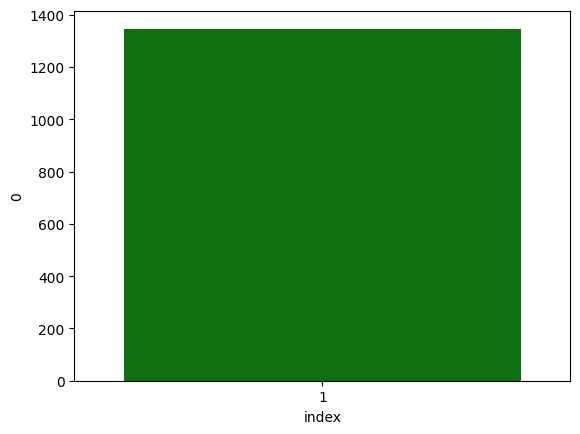

In [10]:
analyzeData(testDfs)

# Graph Analysis

In [6]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

PATH = "../higena/src/test/outputs/"

In [25]:
df = importGraphAnalytics(PATH + "graph_statistics.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 7745
Total number of correct submissions: 991
Total number of incorrect submissions: 6754
Total number of edges: 11832


In [63]:
df

,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumEdges
0,jyS8Bmceejj9pLbTW,Inv1,30,7,23,48
1,jyS8Bmceejj9pLbTW,Inv2,55,7,48,75
2,jyS8Bmceejj9pLbTW,Inv3,39,14,25,49
3,jyS8Bmceejj9pLbTW,Inv4,95,18,77,115
4,PQAJE67kz8w5NWJuM,inv1,24,14,10,43
5,PQAJE67kz8w5NWJuM,inv2,20,5,15,38
6,PQAJE67kz8w5NWJuM,inv3,27,6,21,42
7,PQAJE67kz8w5NWJuM,inv4,39,13,26,68
8,PQAJE67kz8w5NWJuM,inv5,75,9,66,143
9,PQAJE67kz8w5NWJuM,inv6,58,11,47,111


# Hint Analysis

## No New Paths
- Does not add any new paths when TED too long;
- Uses APTED;
- Uses TED for the cost function;

Import data.

In [7]:
df = pd.read_json(PATH + "no_new_paths_hint_stats.json", lines=True)
total_hints = len(df)

Analyze distances.

In [8]:
longer_paths = df[df["srcDstTED"] < df["totalTED"]]
equal_paths = df[df["srcDstTED"] == df["totalTED"]]
num_longer_paths = len(longer_paths)
num_equal_paths = len(equal_paths)

print("Total number of hints: " + str(total_hints))
print("Number of hints with longer paths: " + str(num_longer_paths) + " (" + str(round(num_longer_paths / total_hints * 100, 2)) + "%)")
print("Number of hints with equal paths: " + str(num_equal_paths) + " (" + str(round(num_equal_paths / total_hints * 100, 2)) + "%)")

Total number of hints: 1346
Number of hints with longer paths: 90 (6.69%)
Number of hints with equal paths: 1256 (93.31%)


In [9]:
longer_paths[["expression", "targetExpr", "hint"]].head(1)

,expression,targetExpr,hint
2,eventually (always some f:File | f not in Trash implies f in Trash'),eventually (some f:File| always f in Trash),"Keep going! Missing ""&"".Try adding it inside of ""!in""."


## APTED Mapping
- Creates new paths when TED too long;
- Uses APTED;
- Uses TED for the cost function;

Import data.

In [10]:
apted_df = pd.read_json(PATH + "apted_hint_stats.json", lines=True)
total_hints = len(apted_df)

Analyze number of new nodes in the graph.

In [11]:
count = apted_df["isNewNode"].value_counts()
count

True     1021
False     325
Name: isNewNode, dtype: int64

In [12]:
print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1346
Number of old submissions: 325 (24.15%)
Number of new submissions: 1021 (75.85%)


## GumTree Mapping
- Creates new paths when TED too long;
- Uses GumTree;
- Uses TED for the cost function;

Import data.

In [17]:
gumtree_df = pd.read_json(PATH + "gumtree_hint_stats.json", lines=True)

Compare number of operations generated.

In [19]:
# Merge the two dataframes
merge_df = pd.merge(apted_df, gumtree_df, on=["challenge", "predicate", "expression", "code"], suffixes=("_a", "_g"))
merge_df.drop(["challenge", "predicate", "code", "type_a", "type_g"], inplace=True, axis=1)
total_hints = len(merge_df)

# Add columns counting number of operations
merge_df["nOps_a"] = merge_df["operations_a"].apply(lambda x: len(x[1:-1].split(")\", \"")))
merge_df["nOps_g"] = merge_df["operations_g"].apply(lambda x: len(x[1:-1].split(")\", \"")))

# Count number of hints with lower, higher and equal number of operations
lower = merge_df[merge_df["nOps_a"] < merge_df["nOps_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["nOps_a"] > merge_df["nOps_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["nOps_a"] == merge_df["nOps_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower number of operations: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower number of operations: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal number of operations: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")

Total number of hints: 1346
APTED lower number of operations: 377 (28.01%)
GumTree lower number of operations: 308 (22.88%)
Equal number of operations: 661 (49.11%)


In [20]:
# count number of hints with lower, higher and equal time
lower = merge_df[merge_df["time_a"] < merge_df["time_g"]]
num_lower = len(lower)
higher = merge_df[merge_df["time_a"] > merge_df["time_g"]]
num_higher = len(higher)
equal = merge_df[merge_df["time_a"] == merge_df["time_g"]]
num_equal = len(equal)

print("Total number of hints: " + str(total_hints))
print("APTED lower time: " + str(num_lower) + " (" + str(round(num_lower / total_hints * 100, 2)) + "%)")
print("GumTree lower time: " + str(num_higher) + " (" + str(round(num_higher / total_hints * 100, 2)) + "%)")
print("Equal time: " + str(num_equal) + " (" + str(round(num_equal / total_hints * 100, 2)) + "%)")


Total number of hints: 1346
APTED lower time: 810 (60.18%)
GumTree lower time: 292 (21.69%)
Equal time: 244 (18.13%)


## Node popularity
- Creates new paths when TED too long;
- Uses APTED;
- Uses node popularity poisson distribution for the cost function;

Import data.

In [32]:
node_df = pd.read_json(PATH + "node_poisson_hint_stats.json", lines=True)
total_hints = len(node_df)

## Edge popularity
- Creates new paths when TED too long;
- Uses APTED;
- Uses edge popularity poisson distribution for the cost function;

Import data.

In [30]:
edge_df = pd.read_json(PATH + "edge_poisson_hint_stats.json", lines=True)
total_hints = len(edge_df)